## Logistic Regression Model

In [1]:
import os
import pandas as pd
import numpy as np
import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt


In [2]:
# Load preprocessed data splits from .pkl files
def load_splits(save_dir):
    """
    Loads the data splits from .pkl files.

    Parameters:
        save_dir (str): Directory containing the .pkl files.

    Returns:
        dict: Dictionary containing the loaded data splits.
    """
    data_splits = {}
    for file_name in os.listdir(save_dir):
        if file_name.endswith(".pkl"):
            key = file_name.split(".pkl")[0]
            file_path = os.path.join(save_dir, file_name)
            with open(file_path, "rb") as f:
                data_splits[key] = pickle.load(f)
    print(f"Data splits loaded from .pkl files in directory: {save_dir}")
    return data_splits


In [3]:
# Directory for the preprocessed data
processed_data_dir = "../dataset/splits_pkl"

# Load data splits
data_splits = load_splits(processed_data_dir)


Data splits loaded from .pkl files in directory: ../dataset/splits_pkl


In [4]:
# Access loaded data splits
X = data_splits["X"]
y = data_splits["Y"]
X_train = data_splits["X_train"]
X_val = data_splits["X_val"]
X_test = data_splits["X_test"]
y_train = data_splits["y_train"]
y_val = data_splits["y_val"]
y_test = data_splits["y_test"]


In [5]:
# Logistic Regression Model
model_lr = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [6]:
# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)


In [7]:
# Evaluate Logistic Regression Model
evaluate_model(y_test, y_pred_lr, "Logistic Regression")



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Confusion Matrix:
[[83171  2124]
 [ 6746 78548]]


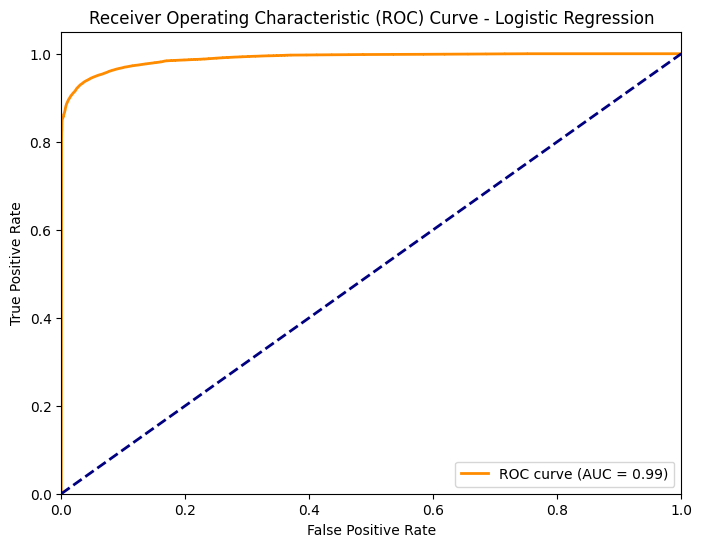

In [8]:
# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [9]:
# Cross-Validation for Logistic Regression
def evaluate_with_cross_validation(model, X, y, model_name, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    auc_scores = cross_val_score(
        model, X, y, cv=skf, scoring=make_scorer(roc_auc_score, response_method="predict_proba")
    )
    print(f"{model_name} Mean ROC-AUC (Cross-Validation): {auc_scores.mean():.4f}")
    print(f"{model_name} ROC-AUC Scores per Fold: {auc_scores}")
    return auc_scores

auc_lr = evaluate_with_cross_validation(model_lr, X, y, "Logistic Regression")


Logistic Regression Mean ROC-AUC (Cross-Validation): 0.9893
Logistic Regression ROC-AUC Scores per Fold: [0.98979319 0.9892523  0.98931061 0.98932287 0.98901124]


In [10]:
# Save Logistic Regression Model
models_dir = '../Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

lr_model_path = os.path.join(models_dir, 'fraud_detection_logistic_regression_model.pkl')
joblib.dump(model_lr, lr_model_path)


['../Models\\fraud_detection_logistic_regression_model.pkl']